# Question 1

In [ ]:
!pip install scikit-learn scikit-image

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

ds = fetch_openml('mnist_784')
x, y = ds.data, ds.target

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


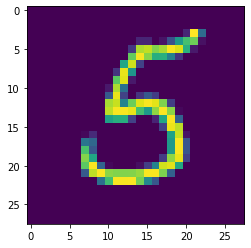

In [ ]:
import matplotlib.pyplot as plt
a = x_train[0].reshape((28,28))
plt.imshow(a)

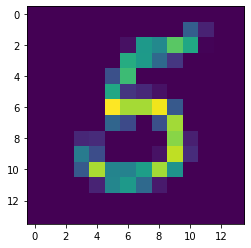

In [ ]:
# code for down-sampling
import cv2
b = cv2.resize(a, (14,14))

plt.imshow(b) 


In [73]:
import numpy as np
x_train.shape

x_train_resized = np.apply_along_axis(lambda image: cv2.resize(image.reshape(28, 28), (14, 14)).flatten(), 1, x_train)
x_val_resized = np.apply_along_axis(lambda image: cv2.resize(image.reshape(28, 28), (14, 14)).flatten(), 1, x_val)
x_train_resized = x_train_resized[:10000,:]
y_train_resized = y_train[:10000,]



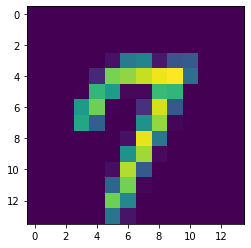

In [74]:
plt.imshow(x_train_resized[349].reshape((14, 14)))

In [75]:
from sklearn import svm
classifier = svm.SVC(C=1.0, kernel='rbf', gamma='scale', verbose=True)
classifier.fit(x_train_resized, y_train_resized)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

In [76]:
svc_preds = classifier.predict(x_val_resized)

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix
val_acc = accuracy_score(y_val, svc_preds)
print("Validation Accuracy: " + str(val_acc))

confusion_matrix(y_val, svc_preds)

Validation Accuracy: 0.9620714285714286


array([[1327,    1,    2,    0,    2,    2,    3,    1,    4,    1],
       [   0, 1573,    7,    6,    1,    1,    0,    5,    6,    1],
       [   1,    6, 1329,    6,    9,    4,    5,    8,    9,    3],
       [   1,    5,   15, 1351,    1,   22,    4,   14,   13,    7],
       [   3,    1,    3,    0, 1243,    0,    5,    3,    2,   35],
       [   2,    6,    3,   28,    3, 1217,    9,    0,    5,    0],
       [   5,    2,    0,    0,    8,    8, 1371,    0,    2,    0],
       [   2,    8,   12,    1,    7,    0,    0, 1447,    4,   22],
       [   2,    8,    8,   21,   11,   12,    7,    7, 1279,    2],
       [   6,    7,    3,   19,   27,    2,    0,   19,    5, 1332]])

In [78]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.01, 0.1, 1, 10, 100]}
gsv = GridSearchCV(classifier, parameters, scoring = 'accuracy', verbose=1, cv = 2)
gsv.fit(x_train_resized, y_train_resized)



Fitting 2 folds for each of 5 candidates, totalling 10 fits
[LibSVM]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.8min finished


[LibSVM]

GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=True),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=1)

In [81]:
accs = gsv.cv_results_['mean_test_score']
for acc, params in zip(accs, gsv.cv_results_['params']):
 print("training accuracy of %0.5f with %r" % (acc, params))

print("Best C value:")
print(gsv.best_params_)
  

0.57370 training accuracy with {'C': 0.01}
0.91420 training accuracy with {'C': 0.1}
0.95240 training accuracy with {'C': 1}
0.95820 training accuracy with {'C': 10}
0.95720 training accuracy with {'C': 100}
Best C value:
{'C': 10}


In [ ]:
gabor_x_train = x_train_resized[:500]
gabor_y_train = y_train[:500]

gabor_x_val = x_val_resized[:500]
gabor_y_val = y_val[:500]


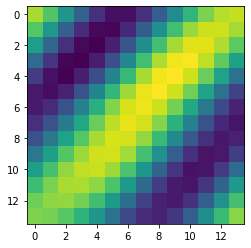

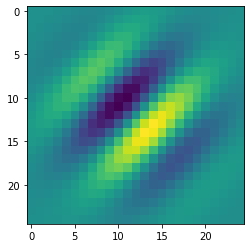

In [ ]:
from skimage.filters import gabor_kernel, gabor
import numpy as np

freq, theta, bandwidth = 0.1, np.pi/4, 1
gk = gabor_kernel(frequency=freq, theta=theta, bandwidth=bandwidth)
plt.figure(1); plt.clf(); plt.imshow(gk.real)
plt.figure(2); plt.clf(); plt.imshow(gk.imag)

image = gabor_x_train[0].reshape((14,14))
coeff_real, _ = gabor(image, frequency=freq, theta=theta,
bandwidth=bandwidth)
plt.figure(1); plt.clf(); plt.imshow(coeff_real)